#CRISP-DM


#1. Business Understanding:
Data set i used here is Telco Customer Churn Prediction
The business objective is to predict customer churn. By identifying the customers most likely to leave the service, the company can take proactive steps to retain them, such as offering discounts or improved services.


# 2. Data Understanding

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset from Kaggle
!pip install kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip

# Load dataset into pandas dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information about the dataset
df.info()

# Display first few rows
df.head()


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 380kB/s]
100% 172k/172k [00:00<00:00, 379kB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DevicePr

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#3. Data Exploration and Visualizations

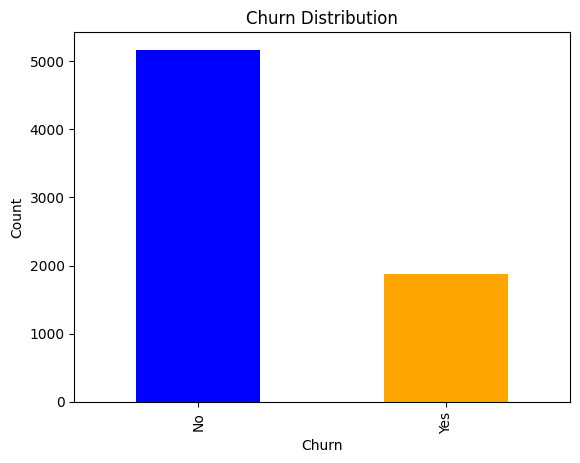

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

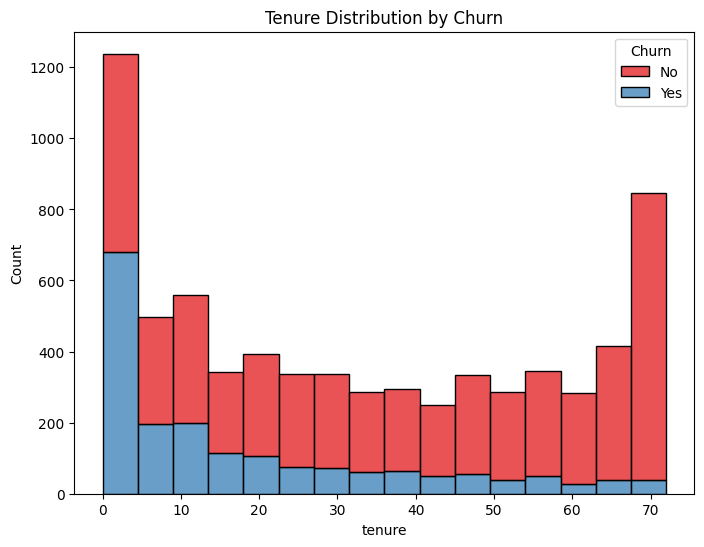

<ipython-input-2-865f8e49fa99>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

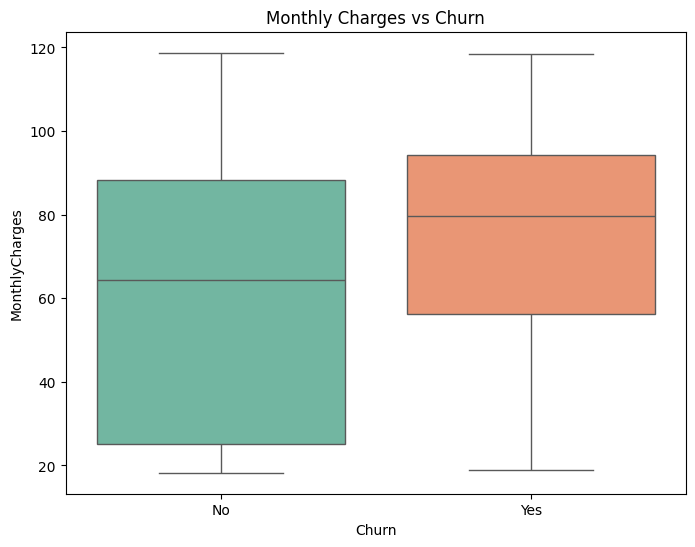

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


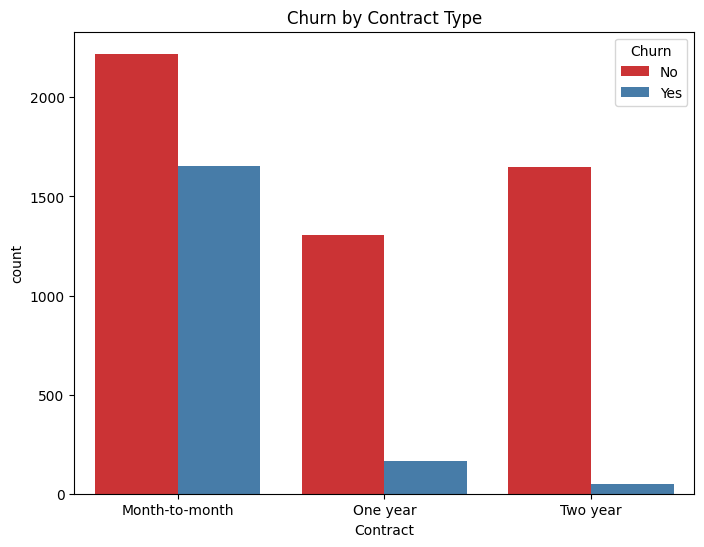

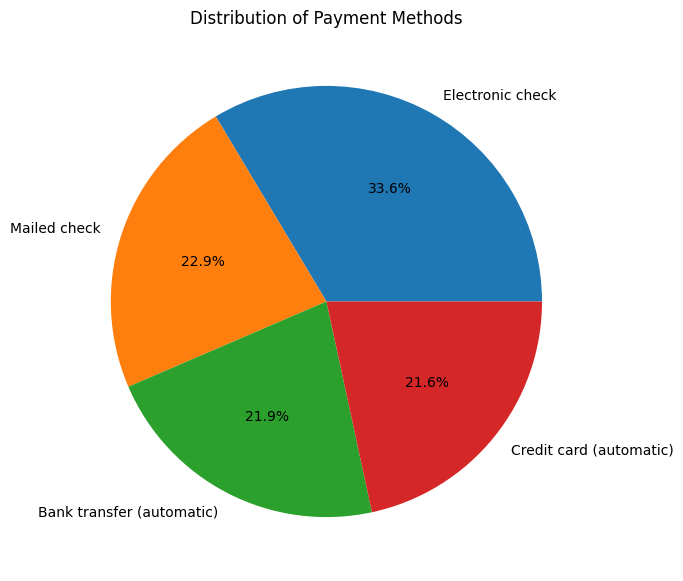

In [2]:
# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()

# Churn Distribution
df['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Churn Distribution")
plt.ylabel("Count")
plt.show()

# Distribution of tenure for churn vs no churn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='Set1')
plt.title("Tenure Distribution by Churn")
plt.show()

# Boxplot of Monthly Charges by Churn
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.show()

# Bar plot of churn rate across different contract types
plt.figure(figsize=(8,6))
sns.countplot(x='Contract', hue='Churn', data=df, palette="Set1")
plt.title("Churn by Contract Type")
plt.show()

# Pie chart showing proportion of different payment methods
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title("Distribution of Payment Methods")
plt.ylabel("")  # Remove y-label for better visualization
plt.show()


#4. Data Preparation

In [3]:
# Data cleaning: Convert TotalCharges to numeric (handling errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables (e.g., Gender, Churn)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding other categorical variables
df = pd.get_dummies(df, drop_first=True)

# Feature scaling (using StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Splitting data into features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<ipython-input-3-dc9a9407536a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


#5. Modeling

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Build a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model performance
print("Best parameters:", grid_search.best_params_)
print("Best training accuracy:", grid_search.best_score_)

# Predict on test set
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters: {'max_depth': None, 'n_estimators': 200}
Best training accuracy: 0.795526563393911
Test Accuracy: 0.7970191625266146
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



#6. Evaluation

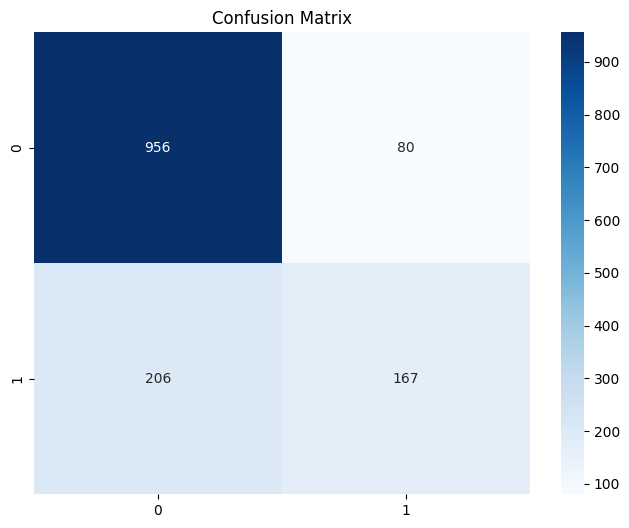

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [5]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

#7. Deployment

In [6]:
import joblib

# Save the trained model to a file
joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

# Load and use the model for future predictions
model = joblib.load('churn_model.pkl')
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample_data)
print(f'Prediction for sample data: {"Churn" if prediction[0] == 1 else "No Churn"}')


Prediction for sample data: Churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
